This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization
and was developed by Matt Newville: https://github.com/newville.

In [2]:
#install lmfit

#uncomment the following lines to install lmfit

# from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])

#import libraries
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit.models import GaussianModel, MoffatModel
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import matplotlib.lines as mlines
import pandas as pd


%matplotlib inline 

In [3]:
#define a function to read the data files
#the original data was previously split into subsets using spreadsheet applications

def read_csv_data(n):
    '''
    The function reads different ranges of data points from separate csv files and returns
    x and y pairs for each range.
    '''
    data_frames = []
    x_values = []
    y_values = []
    
    for i in range(1, n + 1):
        file_path = f"./Data/na{i}.csv"
        df = pd.read_csv(file_path, sep=" ", header = None)
        
        # Assuming the column indices for x and y are 0 and 1
        x = df.iloc[:, 0:1]
        y = df.iloc[:, 1:2]
        
        data_frames.append(df)
        x_values.append(x)
        y_values.append(y)
    
    return data_frames, x_values, y_values

In [4]:
#load the data

n = 4  # there are 11 csv files in the data folder
dfs, x_vals, y_vals = read_csv_data(n)

In [5]:
#verify the data
dfs[1].head() #preview the first dataframe from the list

,0,1
0,310,41
1,311,71
2,312,55
3,313,42
4,314,63


In [6]:
y_vals[1]

,1
0,41
1,71
2,55
3,42
4,63
...,...
93,39
94,38
95,48
96,38


In [7]:
#use builtin NameModel, specify prefix for each:

mod2 = MoffatModel(prefix='g2_') 

mod4 = MoffatModel(prefix='g4_') 

In [8]:
pars2  = mod2.make_params(g2_amplitude=11322.0, g2_center=349.0, g2_sigma=15.5, g2_beta=1)
                         
pars4  = mod4.make_params(g4_amplitude=86.0, g4_center=737.0, g4_sigma=16.6, g4_beta=1)

In [9]:
#fit with weights=1./yerr
result2 = mod2.fit(y_vals[1], pars2, x = x_vals[1])
result4 = mod4.fit(y_vals[3], pars4, x = x_vals[3])

In [10]:
#print the Fit Statistics and parameters
print(result2.fit_report())
print(result4.fit_report())

[[Model]]
    Model(moffat, prefix='g2_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 98
    # variables        = 4
    chi-square         = 31280.2935
    reduced chi-square = 332.769080
    Akaike info crit   = 573.046058
    Bayesian info crit = 583.385928
    R-squared          = 0.98695517
[[Variables]]
    g2_amplitude:  500.676668 +/- 5.43580015 (1.09%) (init = 11322)
    g2_center:     350.442278 +/- 0.16204694 (0.05%) (init = 349)
    g2_sigma:      22.1101986 +/- 1.49649251 (6.77%) (init = 15.5)
    g2_beta:       1.53727582 +/- 0.13543681 (8.81%) (init = 1)
    g2_fwhm:       33.3772794 +/- 0.58939665 (1.77%) == '2*g2_sigma*sqrt(2**(1.0/max(1e-3, g2_beta))-1)'
    g2_height:     500.676668 +/- 5.43580015 (1.09%) == 'g2_amplitude'
[[Correlations]] (unreported correlations are < 0.100)
    C(g2_sigma, g2_beta)      = +0.9806
    C(g2_amplitude, g2_sigma) = -0.5560
    C(g2_amplitude, g2_beta)  = -0.4472
[[Model]]
   

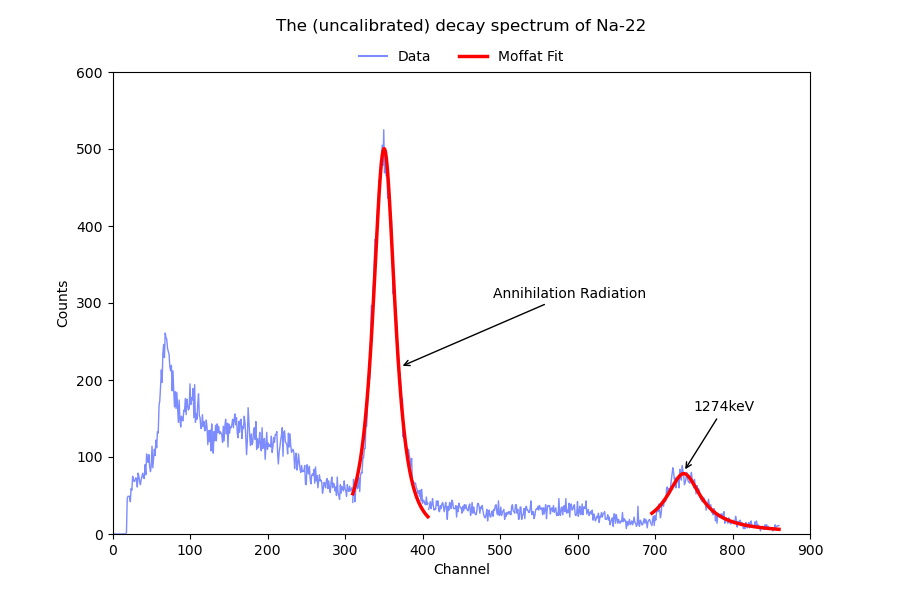

In [19]:
%matplotlib widget

plt.figure(figsize=(9,6))

#plot data and models
plt.plot(x_vals[0], y_vals[0], '#7c8bfd', linewidth=1)

plt.plot(x_vals[1], y_vals[1], '#7c8bfd', linewidth=1)
plt.plot(x_vals[1], result2.best_fit, 'r-', linewidth=2.5)

plt.plot(x_vals[2], y_vals[2], '#7c8bfd', linewidth=1)

plt.plot(x_vals[3], y_vals[3], '#7c8bfd', linewidth=1)
plt.plot(x_vals[3], result4.best_fit, 'r-', linewidth=2.5)



plt.ylabel('Counts')
plt.xlabel('Channel')


plt.ylim(0, 600) 
plt.xlim(0, 900)
#plt.yscale('log')

#make annotations
plt.annotate('Annihilation Radiation', xy=(371, 217), xytext=(491, 307),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )
plt.annotate('1274keV', xy=(737, 81), xytext=(750, 160),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

# Create legend entries for the blue and red lines (data and model) and display the legend
blue_line = mlines.Line2D([], [], color='#7c8bfd', label='Data')

red_line = mlines.Line2D([], [], color='red', label='Moffat Fit', linewidth=2.5)

plt.legend([blue_line, red_line], ['Data', 'Moffat Fit'], loc='lower center', bbox_to_anchor= (0.5, 1.005), ncol=2,
            borderaxespad=0, frameon=False)

plt.title('The (uncalibrated) decay spectrum of Na-22', y = 1.07)

#show the plot
plt.show()





---

## References

### **The images below are included as a reference for the decay scheme and gamma ray energies** 

![](./img/Na_spectrum.png)

https://gammaray.inl.gov/SiteAssets/catalogs/nai/pdf/na22.pdf


![](./img/Na_energy_table.png)


https://nucleardata.nuclear.lu.se/toi/nuclide.asp?iZA=110022